In [1]:
# First Import our  Libraries 
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

# !pip install cufflinks
# This line installs the Cufflinks library, 
# which is a library that integrates Plotly with Pandas. 
# Cufflinks provides a convenient way 
# to create interactive plots directly from Pandas data structures.

%matplotlib inline
plt.rcParams['patch.force_edgecolor']=True

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objs as go

In [2]:
# import our data 
df = pd.read_csv("Salaries for San Francisco Employee.csv")

C:\Users\dell\AppData\Local\Temp\ipykernel_25880\619465936.py:2: DtypeWarning:

Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
## display and  Overview of our data 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,Not Provided,326373.19,326373.19,2011


In [4]:
#Some consideration of the data.
#We have some data stored in object format and we need to convert it to a float format to deal with it.
series_list = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for series in series_list:
    df[series] = pd.to_numeric(df[series], errors='coerce')



In [5]:
## display and  Overview of our data 
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


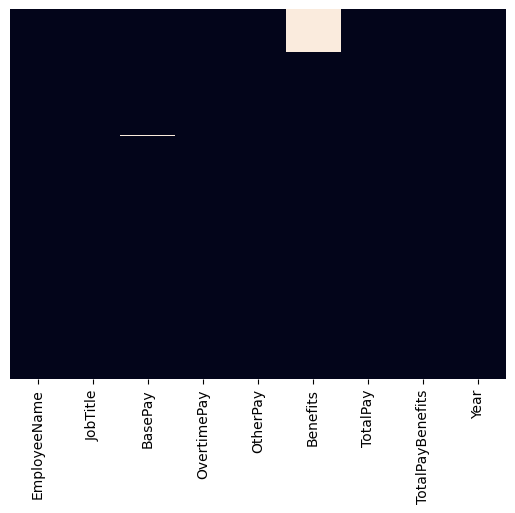

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



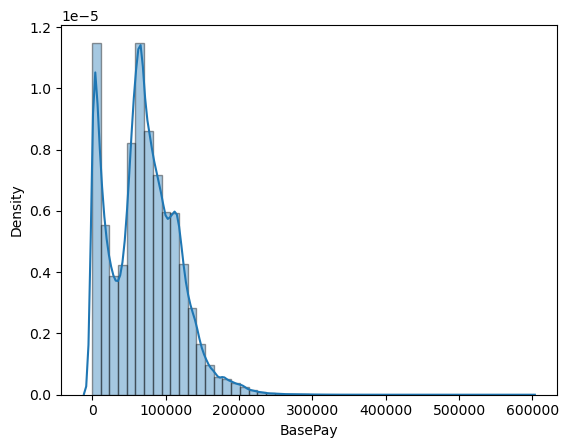

In [7]:
#plt.hist(df["BasePay"])
sns.distplot(df['BasePay']);

In [8]:
df = df[np.isfinite(df['BasePay'])]

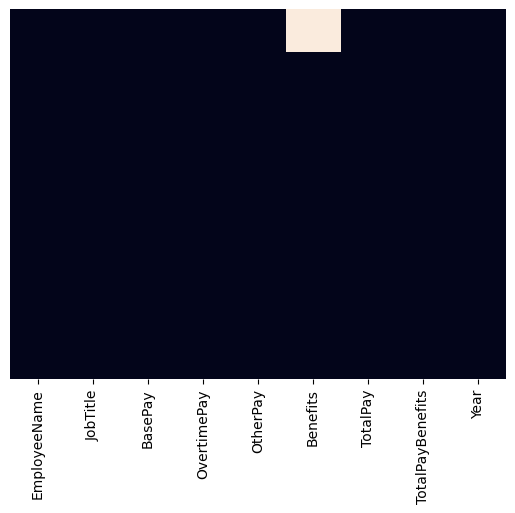

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



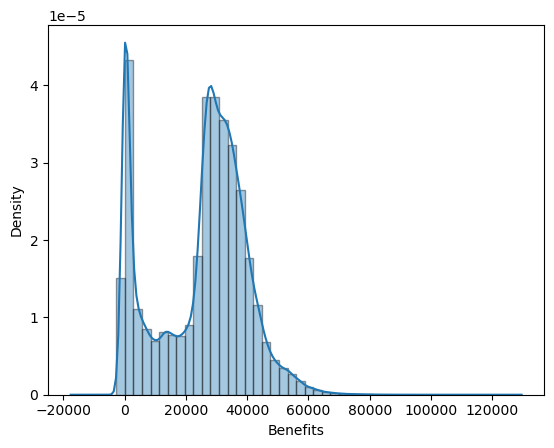

In [10]:
sns.distplot(df['Benefits'].dropna());
    

In [11]:
#We decide, that with a distribution like this, it is a good idea to fill the Nan benefits values with the mean values.
df['Benefits']=df['Benefits'].fillna(value=df['Benefits'].mean())


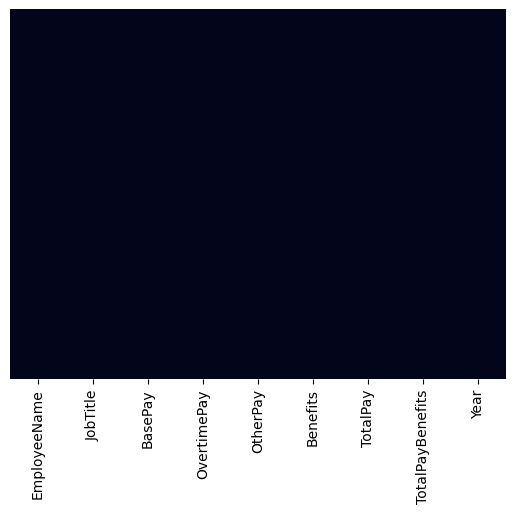

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False);


In [13]:
#Looking at our clean data
df.head()


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25060.072463,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25060.072463,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25060.072463,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25060.072463,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25060.072463,326373.19,326373.19,2011


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 312276 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312276 non-null  object 
 1   JobTitle          312276 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312276 non-null  float64
 4   OtherPay          312276 non-null  float64
 5   Benefits          312276 non-null  float64
 6   TotalPay          312276 non-null  float64
 7   TotalPayBenefits  312276 non-null  float64
 8   Year              312276 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 23.8+ MB


In [15]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312276.000000,312276.000000,312276.000000,312276.000000,312276.000000,312276.000000,312276.000000
mean,69808.257496,5679.901872,3458.858153,25060.072463,78947.017521,101105.339096,2014.628447
std,45376.929428,12755.555087,7366.697345,14176.580329,53177.471120,66424.929512,2.292001
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35722.365000,0.000000,0.000000,17004.347500,39212.180000,49466.777500,2013.000000
50%,67710.450000,0.000000,729.845000,26797.080000,75010.325000,100147.285000,2015.000000
75%,99312.302500,5245.360000,3958.680000,34306.710000,111500.592500,142481.830000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [16]:
#I use the very convenient job title bin function from https://www.kaggle.com/mevanoff24/data-exploration-predicting-salaries

# By executing this code, the 'JobTitle' column in df is mapped to 
# a broader job category based on the defined keywords in the findJobTitle() function.

# This process allows you to group similar job titles into more general categories, 
# which can be useful for aggregating and analyzing data at a higher level of granularity.

def findJobTitle(row):
    
    police_title = ['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant']
    fire_title = ['fire']
    transit_title = ['mta', 'transit']
    medical_title = ['anesth', 'medical', 'nurs', 'health', 'physician', 'orthopedic', 'pharm', 'care']
    court_title = ['court', 'legal']
    automotive_title = ['automotive', 'mechanic', 'truck']
    engineer_title = ['engineer', 'engr', 'eng', 'program']
    general_laborer_title = ['general laborer', 'painter', 'inspector', 'carpenter', 
                             'electrician', 'plumber', 'maintenance']
    aide_title = ['aide', 'assistant', 'secretary', 'attendant']
    
    for police in police_title:
        if police in row.lower():
            return 'police'    
    for fire in fire_title:
        if fire in row.lower():
            return 'fire'
    for aide in aide_title:
        if aide in row.lower():
            return 'assistant'
    for transit in transit_title:
        if transit in row.lower():
            return 'transit'
    for medical in medical_title:
        if medical in row.lower():
            return 'medical'
    if 'airport' in row.lower():
        return 'airport'
    if 'worker' in row.lower():
        return 'social worker'
    if 'architect' in row.lower():
        return 'architect'
    for court in court_title:
        if court in row.lower():
            return 'court'
    if 'major' in row.lower():
        return 'mayor'
    if 'librar' in row.lower():
        return 'library'
    if 'guard' in row.lower():
        return 'guard'
    if 'public' in row.lower():
        return 'public works'
    if 'attorney' in row.lower():
        return 'attorney'
    if 'custodian' in row.lower():
        return 'custodian'
    if 'account' in row.lower():
        return 'account'
    if 'garden' in row.lower():
        return 'gardener'
    if 'recreation' in row.lower():
        return 'recreation leader'
    for automotive in automotive_title:
        if automotive in row.lower():
            return 'automotive'
    for engineer in engineer_title:
        if engineer in row.lower():
            return 'engineer'
    for general_laborer in general_laborer_title:
        if general_laborer in row.lower():
            return 'general laborer'
    if 'food serv' in row.lower():
        return 'food service'
    if 'clerk' in row.lower():
        return 'clerk'
    if 'porter' in row.lower():
        return 'porter' 
    if 'analy' in row.lower():
        return 'analyst'
    if 'manager' in row.lower():
        return 'manager'
    else:
        return 'other'
    
df['GeneralJobTitle'] = df['JobTitle'].map(findJobTitle)

In [17]:
# Grouping the `df` by column 'Year' and takes the mean of the 'TotalPay' column for each group.
pay_by_year=df[['Year', 'TotalPay']].groupby('Year').mean()
pay_by_year

,TotalPay
Year,
2011,71744.103871
2012,74113.262265
2013,78808.285041
2014,75471.836912
2015,77508.269562
2016,80515.131578
2017,84234.645789
2018,87181.908324


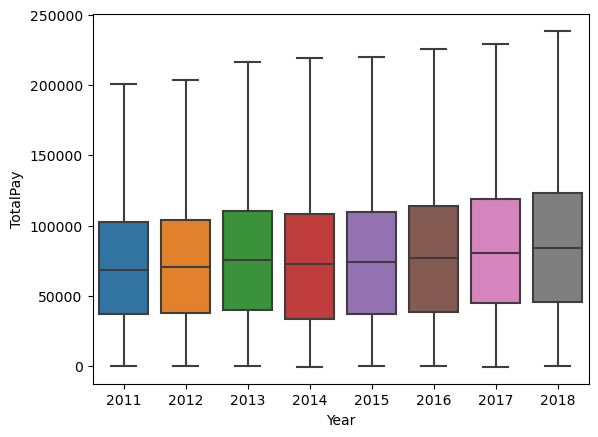

In [18]:
sns.boxplot(x='Year', y='TotalPay', data=df, showfliers=False);


In [19]:
# The average 'TotalPay' for each combination of 'GeneralJobTitle' and 'Year' in the DataFrame df.
salaries_jobs_years=df[['GeneralJobTitle', 'TotalPay', 'Year']].groupby(['GeneralJobTitle', 'Year']).mean()
salaries_jobs_years

TotalPay
GeneralJobTitle Year              
account         2011  56177.342558
                2012  63186.929962
                2013  66857.307417
                2014  63641.837870
                2015  67163.885017
...                            ...
transit         2014  71134.737660
                2015  70041.692743
                2016  74779.333938
                2017  81275.503400
                2018  84087.656687

[208 rows x 1 columns]

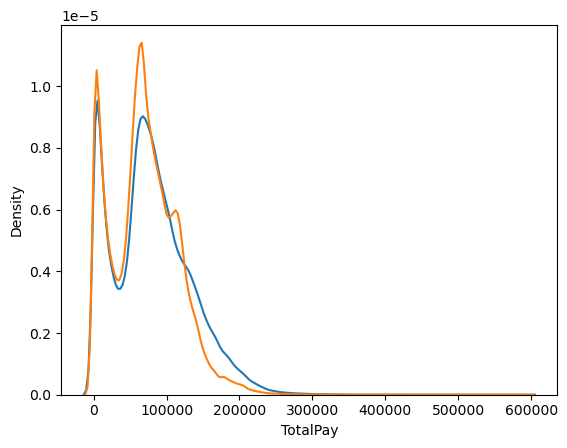

In [20]:
# The code we provided creates kernel density estimation (KDE) plots using the Seaborn library
# to visualize the distribution of 'TotalPay' and 'BasePay' columns in the DataFrame df

sns.kdeplot(df['TotalPay'])
sns.kdeplot(df['BasePay']);

In [21]:
# The code we provided creates a grouped bar chart using the Plotly library 
# to visualize the average 'TotalPay' for different job titles across multiple years.

salaries_jobs_by_year=df[['GeneralJobTitle', 'TotalPay', 'Year']].groupby(['Year', 'GeneralJobTitle']).mean()
job_names=salaries_jobs_by_year.xs(2011, level='Year').index.values.tolist()

trace1 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2011, level='Year')['TotalPay'],
    name='2011'
)
trace2 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2012, level='Year')['TotalPay'],
    name='2012'
)
trace3 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2013, level='Year')['TotalPay'],
    name='2013'
)
trace4 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2014, level='Year')['TotalPay'],
    name='2014'
)
trace5 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2015, level='Year')['TotalPay'],
    name='2015'
)

trace6 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2016, level='Year')['TotalPay'],
    name='2016'
)

trace7 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2017, level='Year')['TotalPay'],
    name='2017'
)

trace8 = go.Bar(
    x=job_names,
    y=salaries_jobs_by_year.xs(2018, level='Year')['TotalPay'],
    name='2018'
)


data = [trace1, trace2, trace3, trace4,trace5,trace6,trace7,trace8]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
cf.iplot(fig, filename='grouped-bar')

In [22]:
# The code we provided calculates the average values of 'BasePay', 'OvertimePay', and 'Benefits' 
# for each 'GeneralJobTitle' in the DataFrame df

salaries_jobs_benefits=df[['GeneralJobTitle', 'BasePay', 'OvertimePay', 'Benefits']].groupby(['GeneralJobTitle']).mean()
salaries_jobs_benefits

,BasePay,OvertimePay,Benefits
GeneralJobTitle,,,
account,66717.135899,341.166288,25659.902588
airport,85402.663850,6826.771058,29906.730478
analyst,86035.061995,227.303458,29010.622275
architect,119825.757335,113.169328,36012.531717
assistant,42629.003325,2150.002835,17494.448297
attorney,141293.661766,27.794923,39396.264523
automotive,72244.294153,9761.070597,28355.382788
clerk,45081.863942,1109.037894,20357.632215
court,63886.657289,635.469540,25520.225705


In [23]:
# The code we provided creates a grouped bar chart using the Plotly library 
# to visualize the average values of 'BasePay', 'OvertimePay', and 'Benefits' for different job titles.

trace1 = go.Bar(
    x=job_names,
    y=salaries_jobs_benefits['BasePay'],
    name='Base Pay'
)
trace2 = go.Bar(
    x=job_names,
    y=salaries_jobs_benefits['OvertimePay'],
    name='Overtime Pay'
)
trace3 = go.Bar(
    x=job_names,
    y=salaries_jobs_benefits['Benefits'],
    name='Benefits'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
cf.iplot(fig, filename='grouped-bar')

In [24]:
# The code we provided installs the gender-guesser library and uses it 
# to determine the gender of the employees in the DataFrame df based on their first names.

!pip install gender-guesser
import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)
df['Gender']=df['EmployeeName'].apply(lambda x: x.split()[0]).apply(lambda x: d.get_gender(x.lower()))

In [25]:
# The code updates the 'Gender' column in the DataFrame df by replacing the values 'mostly_female' with 'female'.

df.loc[df['Gender']=='mostly_female','Gender']='female'

In [26]:
# The code updates the 'Gender' column in the DataFrame df by replacing the values 'mostly_male' with 'male'.

df.loc[df['Gender']=='mostly_male','Gender']='male'

In [27]:
# The code filters the DataFrame df to include only rows where the 'Gender' column has the values 'male' or 'female'. 

df=df[ (df['Gender'] == 'male') | (df['Gender'] == 'female') ]
df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,GeneralJobTitle,Gender
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25060.072463,567595.43,567595.43,2011,transit,male
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25060.072463,538909.28,538909.28,2011,police,male
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25060.072463,335279.91,335279.91,2011,police,male
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25060.072463,332343.61,332343.61,2011,automotive,male
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25060.072463,326373.19,326373.19,2011,fire,male
...,...,...,...,...,...,...,...,...,...,...,...
312877,Daniel W Plautz,Public Service Trainee,0.00,0.00,0.00,0.000000,0.00,0.00,2018,public works,male
312878,David J Thompson,Deputy Sheriff,0.00,0.00,0.00,0.000000,0.00,0.00,2018,police,male
312879,Keiko Weng Yee Lau,Public Service Trainee,0.00,0.00,0.00,0.000000,0.00,0.00,2018,public works,female
312880,David Wong,Deputy Sheriff,0.00,0.00,0.00,0.000000,0.00,0.00,2018,police,male


In [28]:
# The code we provided creates a new DataFrame called `salaries_job_gender` by filtering the DataFrame df 
# to include only rows where the 'Gender' column has the values 'male' or 'female'

salaries_job_gender=df[(df['Gender']=='male') | (df['Gender']=='female')][['GeneralJobTitle', 'TotalPay', 'Gender']].groupby(['GeneralJobTitle', 'Gender']).mean()


In [29]:
salaries_job_gender


TotalPay
GeneralJobTitle   Gender               
account           female   66754.610066
                  male     66590.085515
airport           female   90735.105000
                  male     98520.647060
analyst           female   86845.069633
                  male     87093.852664
architect         female  117136.944080
                  male    123464.620261
assistant         female   50830.935207
                  male     42213.923842
attorney          female  141015.322354
                  male    147836.613449
automotive        female   78280.713803
                  male     86925.876074
clerk             female   49689.774082
                  male     40753.945816
court             female   67306.114200
                  male     66379.226049
custodian         female   49139.367917
                  male     49072.408998
engineer          female   75477.248181
                  male     93872.281799
fire              female  137168.111442
                  male    145574.885443
food service      female   42454.535202
                  male     55746.277576
gardener          female   53290.376107
                  male     57773.880285
general laborer   female   82963.112809
                  male     92445.834931
guard             female   15193.480811
                  male     24498.456070
library           female   48811.935162
                  male     39056.388053
manager           female  126788.903910
                  male    130792.908062
medical           female   79755.202392
                  male     85007.348089
other             female   75564.810760
                  male     85053.124694
police            female   98281.995094
                  male    122902.483773
porter            female   49928.217175
                  male     47889.963590
public works      female   36453.545175
                  male     29118.207494
recreation leader female   12349.350310
                  male     13712.240585
social worker     female   66374.904034
                  male     64784.321456
transit           female   68019.095623
                  male     79072.723621

In [30]:
# The code we provided creates a grouped bar chart using the Plotly library 
# to visualize the average 'TotalPay' for different job titles, separated by gender. 

salaries_gender=df[(df['Gender']=='male') | (df['Gender']=='female')][['GeneralJobTitle', 'TotalPay', 'Gender']].groupby(['Gender', 'GeneralJobTitle']).mean()

trace1 = go.Bar(
    x=job_names,
    y=salaries_gender.xs('male', level='Gender')['TotalPay'],
    name='Male'
)
trace2 = go.Bar(
    x=job_names,
    y=salaries_gender.xs('female', level='Gender')['TotalPay'],
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
cf.iplot(fig, filename='grouped-bar')

#I can easily notice that there is evidence of pay discrimination based on gender.
#In only 4 gropus (15%) women earn noticeably more than men.
#In 9 groups (35%) women and men earn more or less the same amount of money.
#In remaining 13 (50%!) groups men earn significantly more than women.
#The biggest difference can be seen in the engineer group.

In [31]:
# The code we provided creates a grouped bar chart using the Plotly library 
# to visualize the average 'TotalPay' for different job titles, separated by gender.

salaries_more_than_200k=df[df['TotalPay']>200000]['GeneralJobTitle'].value_counts().drop('other')
salaries_more_than_200k.iplot(kind='bar')

The job groups in which the most people earn supranormal amount of moneyare clearly Firemen, Policemen and Medical.

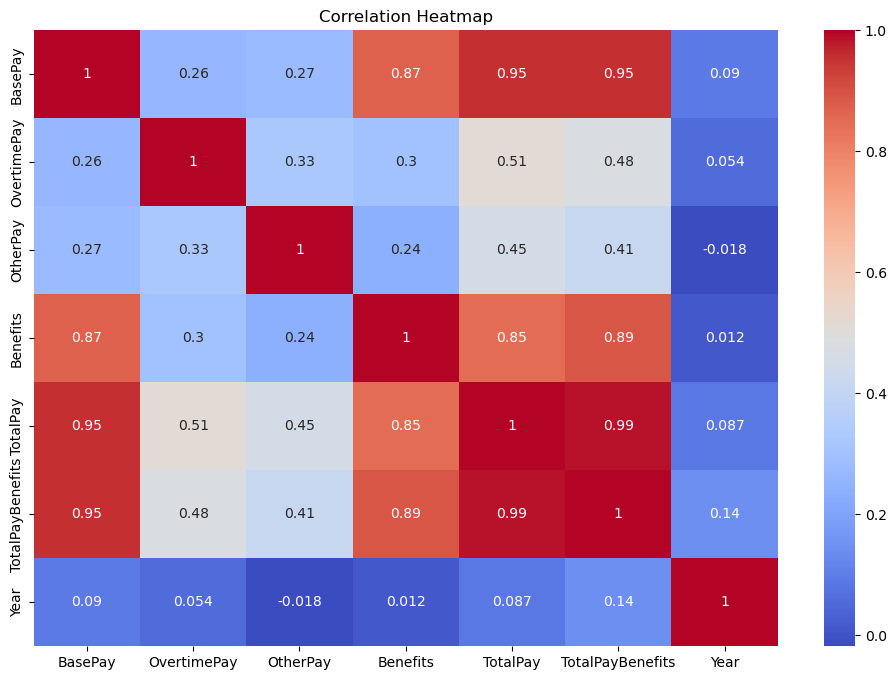

In [32]:
# The code we provided creates a correlation heatmap using the seaborn library 
# to visualize the correlation between different numerical columns in the DataFrame df

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
# The code we provided demonstrates a simple linear regression model using scikit-learn 
# to predict the 'BasePay' based on several input features.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Prepare the data
# Assuming you have a DataFrame 'df' with the required columns

# Split the data into input (X) and target (y) variables
X = df[['OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year']]
y = df['BasePay']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print("Training Mean Squared Error (MSE):", train_mse)

test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Testing Mean Squared Error (MSE):", test_mse)

# Step 5: Make predictions
# Assuming you have a new DataFrame 'new_data' with the same columns as the training data
new_data = pd.DataFrame({
    'OvertimePay': [0],
    'OtherPay': [400184.25],
    'Benefits': [25060.072463],
    'TotalPay': [569595.43],
    'TotalPayBenefits': [567595.43],
    'Year': [2011]
})

prediction = model.predict(new_data)
print("Predicted BasePay:", prediction)



Training Mean Squared Error (MSE): 4.2904453661599636e-20
Testing Mean Squared Error (MSE): 4.1792675054504697e-20
Predicted BasePay: [169411.18]


In [34]:
df.head(50)


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,GeneralJobTitle,Gender
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25060.072463,567595.43,567595.43,2011,transit,male
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25060.072463,538909.28,538909.28,2011,police,male
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25060.072463,335279.91,335279.91,2011,police,male
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25060.072463,332343.61,332343.61,2011,automotive,male
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25060.072463,326373.19,326373.19,2011,fire,male
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,25060.072463,316285.74,316285.74,2011,assistant,male
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,25060.072463,307899.46,307899.46,2011,other,male
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,25060.072463,303427.55,303427.55,2011,fire,male
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,25060.072463,302377.73,302377.73,2011,fire,female
10,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,25060.072463,299494.17,299494.17,2011,fire,male


In [35]:
# The code provided demonstrates the use of LabelEncoder from scikit-learn to encode categorical columns in a DataFrame.

from sklearn.preprocessing import LabelEncoder

# Step 1: Prepare the data
# Assuming you have a DataFrame 'df' with the required columns

# Encode categorical columns using label encoding
le = LabelEncoder()
df['GeneralJobTitle_encoded'] = le.fit_transform(df['GeneralJobTitle'])
df['Gender_encoded'] = le.fit_transform(df['Gender'])

In [36]:
df.head(50)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,GeneralJobTitle,Gender,GeneralJobTitle_encoded,Gender_encoded
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,25060.072463,567595.43,567595.43,2011,transit,male,25,1
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,25060.072463,538909.28,538909.28,2011,police,male,20,1
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,25060.072463,335279.91,335279.91,2011,police,male,20,1
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,25060.072463,332343.61,332343.61,2011,automotive,male,6,1
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,25060.072463,326373.19,326373.19,2011,fire,male,11,1
5,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,25060.072463,316285.74,316285.74,2011,assistant,male,4,1
7,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,25060.072463,307899.46,307899.46,2011,other,male,19,1
8,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,25060.072463,303427.55,303427.55,2011,fire,male,11,1
9,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,25060.072463,302377.73,302377.73,2011,fire,female,11,0
10,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,25060.072463,299494.17,299494.17,2011,fire,male,11,1


In [37]:
df['JobTitleCode'] = df['GeneralJobTitle'].astype('category').cat.codes

df['GenderCode'] = df['Gender'].astype('category').cat.codes

print(df[['GeneralJobTitle', 'JobTitleCode', 'Gender', 'GenderCode']].drop_duplicates())


         GeneralJobTitle  JobTitleCode  Gender  GenderCode
0                transit            25    male           1
1                 police            20    male           1
3             automotive             6    male           1
4                   fire            11    male           1
5              assistant             4    male           1
7                  other            19    male           1
9                   fire            11  female           0
11                police            20  female           0
16                 other            19  female           0
17               medical            18    male           1
19             assistant             4  female           0
36               medical            18  female           0
70              attorney             5    male           1
87               manager            17    male           1
88               transit            25  female           0
138             attorney             5  female          

In [38]:
df_modeling=df[[ 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year',
        'GeneralJobTitle_encoded','Gender_encoded']]
df_modeling

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,GeneralJobTitle_encoded,Gender_encoded
0,167411.18,0.00,400184.25,25060.072463,567595.43,567595.43,2011,25,1
1,155966.02,245131.88,137811.38,25060.072463,538909.28,538909.28,2011,20,1
2,212739.13,106088.18,16452.60,25060.072463,335279.91,335279.91,2011,20,1
3,77916.00,56120.71,198306.90,25060.072463,332343.61,332343.61,2011,6,1
4,134401.60,9737.00,182234.59,25060.072463,326373.19,326373.19,2011,11,1
...,...,...,...,...,...,...,...,...,...
312877,0.00,0.00,0.00,0.000000,0.00,0.00,2018,22,1
312878,0.00,0.00,0.00,0.000000,0.00,0.00,2018,20,1
312879,0.00,0.00,0.00,0.000000,0.00,0.00,2018,22,0
312880,0.00,0.00,0.00,0.000000,0.00,0.00,2018,20,1


In [39]:
# The code snippet we provided is using the train_test_split function from the sklearn.model_selection module 
# to split the data into training and testing sets for modeling purposes.

from sklearn.model_selection import train_test_split
X = df_modeling.iloc[:, 0:8].values
y = df_modeling.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
# The code snippet we provided is using the StandardScaler class from the sklearn.preprocessing module
# to standardize the feature data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
# The code snippet you provided is applying Principal Component Analysis (PCA) 
# to reduce the dimensionality of the feature data.

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [42]:
print(explained_variance
    )

[0.51930672 0.14158377]


In [43]:
# The code snippet you provided is applying Logistic Regression 
# to the transformed training data (X_train) and corresponding target labels (y_train).

from sklearn.linear_model import LogisticRegression 
 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [44]:
# The code snippet y_pred_logisticRegression = classifier.predict(X_test) is using the trained logistic regression 
# model (classifier) to make predictions on the test data (X_test).

# Predicting the test set result using
# predict function under LogisticRegression
y_pred_logisticRegression = classifier.predict(X_test)

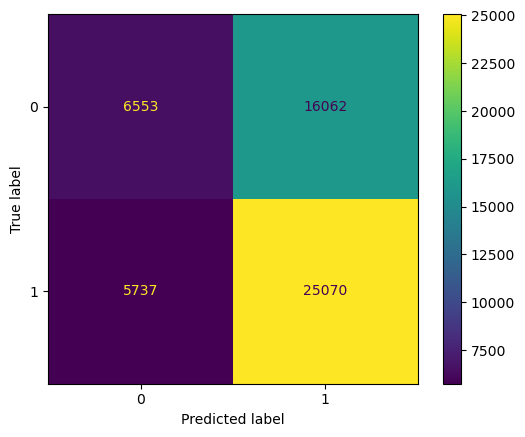

In [45]:
# The resulting confusion matrix plot provides insights into the performance of the logistic regression model 
# by visualizing the true positive, true negative, false positive, and false negative predictions.

# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_logisticRegression)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [46]:
# The code snippet is using the accuracy_score function from scikit-learn's metrics module 
# to calculate the accuracy of the logistic regression model's predictions.

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_logisticRegression)

0.591947137883269

In [47]:
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier()
RandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_randomForest = RandomForest.predict(X_test)

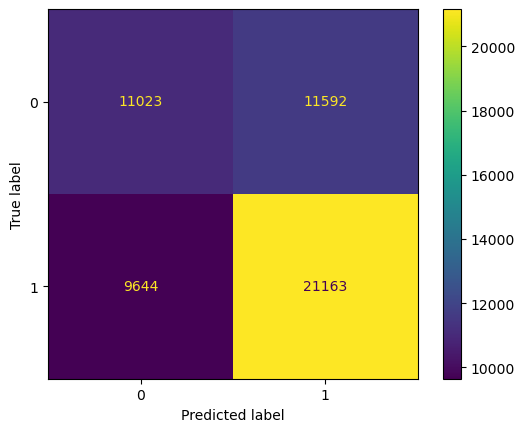

In [49]:
# The code snippet is using the Random Forest Classifier from scikit-learn to train a random forest model.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
cm = confusion_matrix(y_test, y_pred_randomForest)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [50]:
# To calculate the accuracy score of the Random Forest Classifier model on the test set, 
# you can use the accuracy_score function from scikit-learn.

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_randomForest )

0.602485867245704